Unique land cover classes: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 255]
Counts per class: {0: 22495342, 1: 2480863, 2: 3531068, 3: 2901006, 4: 2181979, 5: 1837775, 6: 1715829, 7: 1580905, 8: 1381664, 9: 1185302, 10: 992359, 11: 822990, 12: 659701, 13: 517148, 14: 407984, 15: 321374, 16: 264232, 17: 212660, 18: 174405, 19: 145610, 20: 123025, 21: 105254, 22: 91145, 23: 79286, 24: 70750, 25: 63257, 26: 57464, 27: 53805, 28: 50742, 29: 48136, 30: 46708, 31: 45482, 32: 44764, 33: 43335, 34: 42339, 35: 40529, 36: 39126, 37: 37820, 38: 36319, 39: 34957, 40: 33084, 41: 32031, 42: 30705, 43: 29464, 44: 28582, 45: 27967, 46: 27366,

/var/folders/v0/wy271jwd78s15t1wyygmmjrm0000gn/T/ipykernel_25171/3299988135.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  custom_cmap = plt.cm.get_cmap('viridis', num_colors)


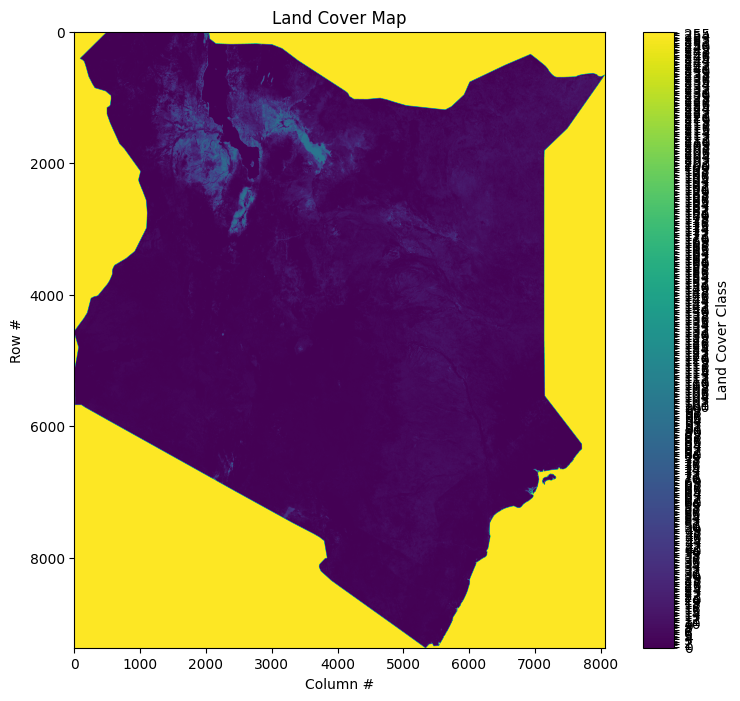

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

landcover_path = "/Users/theodoreutomo/algoverse-research-project/data/raw/landcover/C100_global_v3.0.1_2019-nrt_Bare-CoverFraction-layer.tif"  # adjust path as needed
with rasterio.open(landcover_path) as src:
    landcover_data = src.read(1)         # read the first (or only) band
    landcover_crs = src.crs              # get the coordinate reference system
    landcover_bounds = src.bounds        # get the spatial bounds

unique_classes, counts = np.unique(landcover_data, return_counts=True)
print("Unique land cover classes:", unique_classes)
print("Counts per class:", dict(zip(unique_classes, counts)))

# Discrete Colormap for 102 Classes
# Determine the minimum and maximum class values.
vmin = unique_classes.min()
vmax = unique_classes.max()

# Calculate the number of discrete colors required.
num_colors = vmax - vmin + 1

# Create a discrete colormap using 'viridis' with the number of colors equal to num_colors.
custom_cmap = plt.cm.get_cmap('viridis', num_colors)

# Create a norm that maps each class value to a unique color.
# The boundaries are set so that each integer value is centered in its bin.
norm = BoundaryNorm(boundaries=np.arange(vmin - 0.5, vmax + 1.5, 1), ncolors=num_colors)

# Visualize the Land Cover Map
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(landcover_data, cmap=custom_cmap, norm=norm)
ax.set_title("Land Cover Map")
ax.set_xlabel("Column #")
ax.set_ylabel("Row #")
cbar = plt.colorbar(img, ax=ax, ticks=np.arange(vmin, vmax+1))
cbar.set_label("Land Cover Class")
plt.show()
